### ML5.1 Предварительная обработка данных.


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import traceback

1. Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится, необходимо его обработать.

In [61]:
dataframe = pd.read_csv('data/cars_sampled.csv', parse_dates=["dateCreated", "lastSeen", "dateCrawled"])
dataframe

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2016-03-04 15:48:00,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-03-04,29690,2016-05-04 15:16:00
49997,2016-03-27 14:55:00,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,2016-03-27,50181,2016-07-04 11:45:00
49998,2016-03-14 18:51:00,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,2016-03-14,86956,2016-03-25 06:17:00
49999,2016-03-15 18:06:00,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,2016-03-15,65232,2016-06-04 17:15:00


2. Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [62]:
print("Размерность: ", dataframe.shape)
print("Имена столбцов данных: ", dataframe.columns)

Размерность:  (50001, 19)
Имена столбцов данных:  Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')


In [63]:
print("Типы переменных:\n", dataframe.dtypes, sep='')

Типы переменных:
dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object


In [64]:
# краткая информация о составе и описание датасета
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

In [65]:
# краткая справка по описательной статистике датасета
dataframe.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [66]:
# количество пустых значений у полей датасета
dataframe.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [67]:
print("Уникальные имена в полях данных датасета:")
data_scale = pd.concat([dataframe.dtypes, dataframe.apply(lambda item: item.unique())], axis=1)
data_scale.columns = ['Type_data', 'Unique_values']
data_scale

Уникальные имена в полях данных датасета:


,Type_data,Unique_values
dateCrawled,datetime64[ns],"[2016-03-30T13:51:00.000000000, 2016-07-03T09:..."
name,object,"[Zu_verkaufen, Volvo_XC90_2.4D_Summum, Volkswa..."
seller,object,"[private, commercial]"
offerType,object,"[offer, request]"
price,int64,"[4450, 13299, 3200, 4500, 18750, 988, 400, 139..."
abtest,object,"[test, control]"
vehicleType,object,"[limousine, suv, bus, small car, station wagon..."
yearOfRegistration,int64,"[2003, 2005, 2006, 2008, 1995, 1996, 1997, 200..."
gearbox,object,"[manual, automatic, nan]"
powerPS,int64,"[150, 163, 101, 86, 185, 90, 0, 136, 122, 140,..."


3. Поработайте с типами переменных. Все числовые значения переведите в формат int.

In [68]:
# Уже реализовано

4. Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

Гистограмма по столбцу price


array([[<AxesSubplot: title={'center': 'price'}>]], dtype=object)

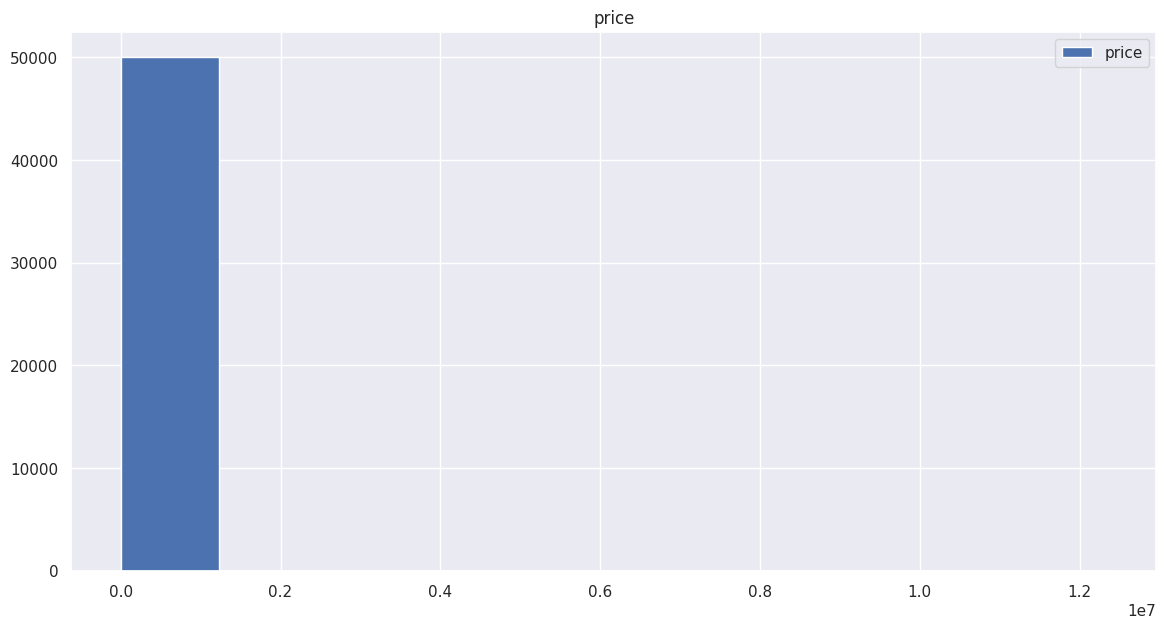

In [69]:
print("Гистограмма по столбцу price")
dataframe.hist(column="price", legend=True)

Ящик с усами до удаления выбросов


<AxesSubplot: >

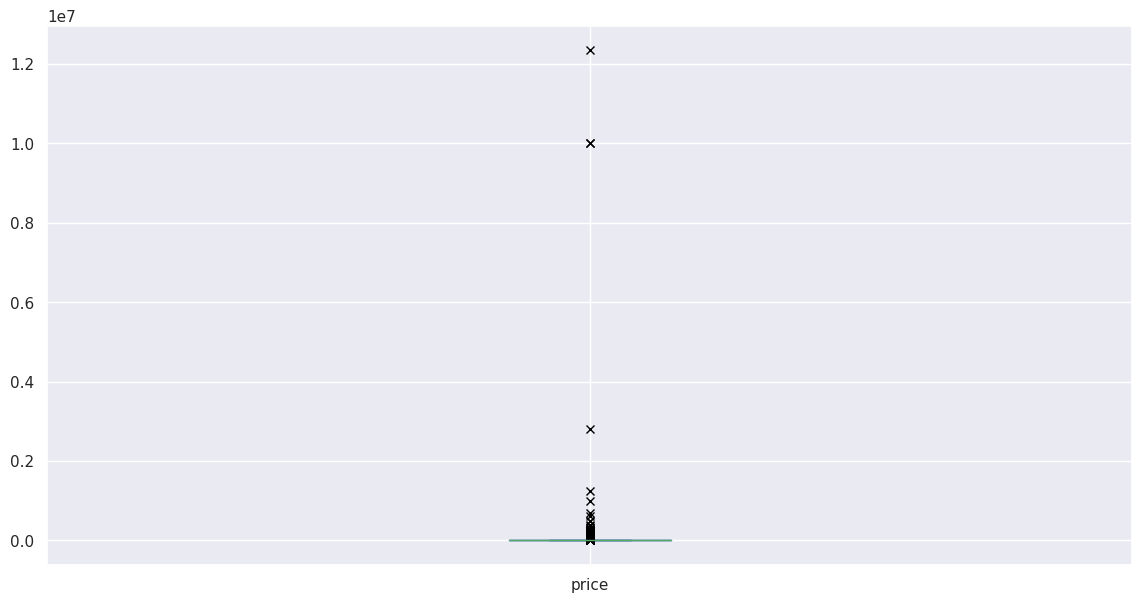

In [70]:
print("Ящик с усами до удаления выбросов")
dataframe['price'].plot.box(flierprops={"marker": "x"})

In [72]:
print("Проверка price на наличие значений NaN и null")
dataframe['price'].isna().sum()

Проверка price на наличие значений NaN и null


0

Чистка выбросов


<AxesSubplot: >

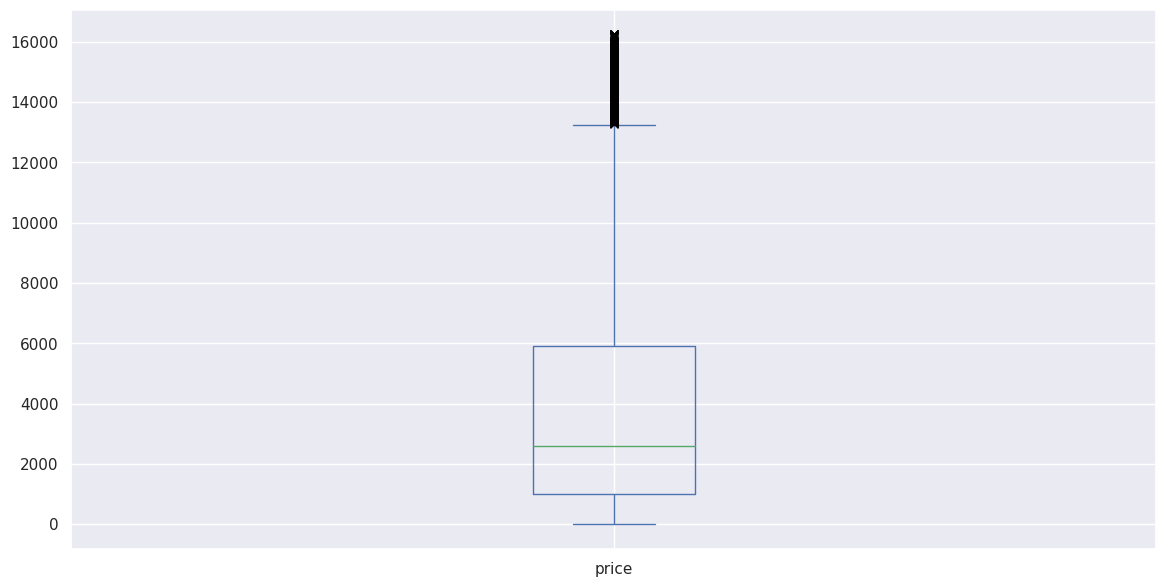

In [73]:
print("Чистка выбросов")
for x_elem in ['price']:
    q75, q25 = np.percentile(dataframe.loc[:, x_elem], [75, 25])
    iqr = q75 - q25

    dataframe.loc[dataframe[x_elem] > q75 + 1.5*iqr, x_elem] = np.nan
    dataframe.loc[dataframe[x_elem] < q25 - 1.5*iqr, x_elem] = np.nan

dataframe['price'].plot.box(flierprops={"marker": "x"})

Гистограмма price после очистки выбросов


array([[<AxesSubplot: title={'center': 'price'}>]], dtype=object)

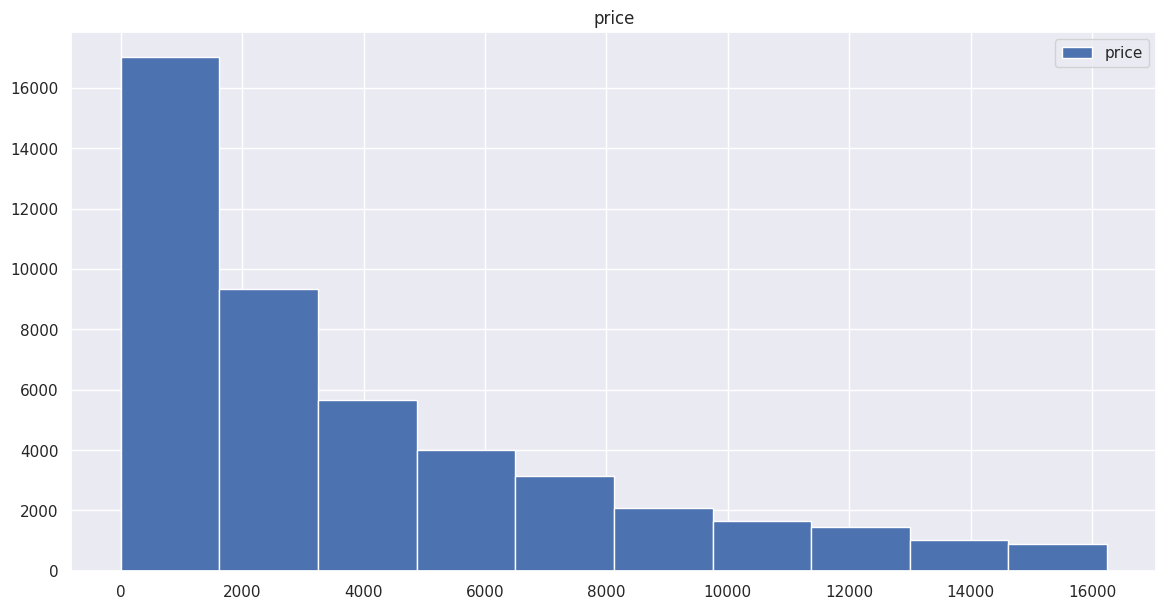

In [74]:
print("Гистограмма price после очистки выбросов")
dataframe.hist(column='price', legend=True)

Нормализируем данные через логарифм


array([[<AxesSubplot: title={'center': 'price'}>]], dtype=object)

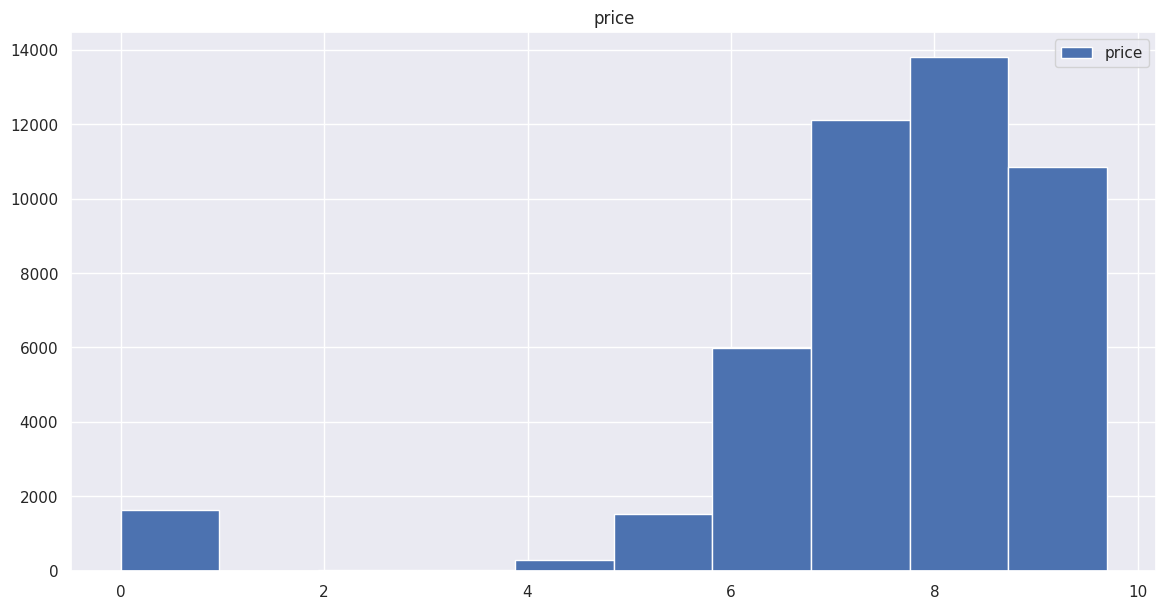

In [75]:
print("Нормализируем данные через логарифм")
dataframe['price'] = np.log(dataframe['price'] + 1)
dataframe.hist(column='price', legend=True)

In [77]:
print(f"Кол-во выбросов после нормализации: {dataframe['price'].isna().sum()}")

Кол-во выбросов: 3757


5. Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

In [18]:
print("Первым делом построим корреляционную матрицу")
dataframe.corr()

Первым делом построим корреляционную матрицу


/tmp/ipykernel_27206/3147389488.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.000000,0.005603,0.096838,-0.108628,0.170537,0.068389
yearOfRegistration,0.005603,1.000000,-0.004394,-0.064188,-0.023152,-0.001615
powerPS,0.096838,-0.004394,1.000000,-0.016447,0.034345,0.017415
kilometer,-0.108628,-0.064188,-0.016447,1.000000,0.001985,-0.024076
monthOfRegistration,0.170537,-0.023152,0.034345,0.001985,1.000000,0.019050
postalCode,0.068389,-0.001615,0.017415,-0.024076,0.019050,1.000000


Визуализируем эту матрицу через тепловую карту seaborn


/tmp/ipykernel_27206/3898480671.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, center=0, square=True, annot=True).figure.set_size_inches(11, 11)


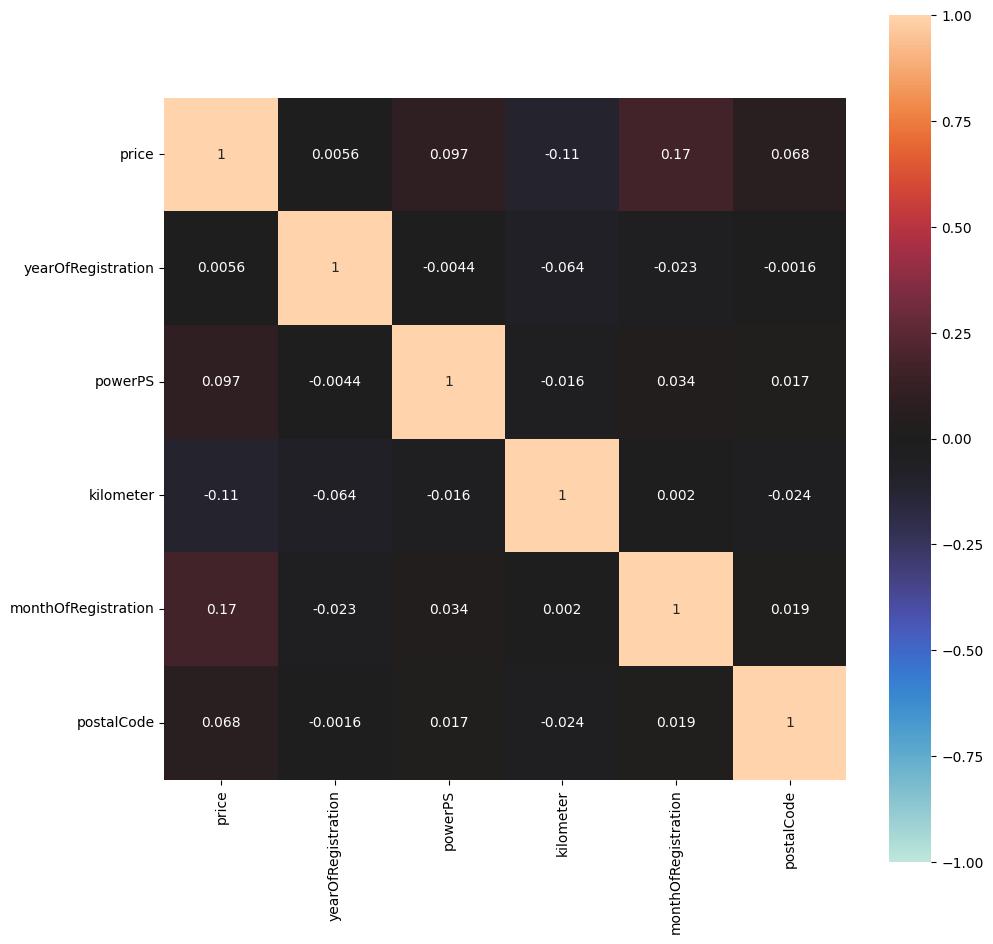

In [19]:
print("Визуализируем эту матрицу через тепловую карту seaborn")
sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, center=0, square=True, annot=True).figure.set_size_inches(11, 11)

- Проанализировав тепловую карту, можно сказать об очень слабой и холодной отчасти связи факторов и целевой переменной price

6. Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

Ящик с усами между столбцами price и gearbox


<AxesSubplot: xlabel='gearbox', ylabel='price'>

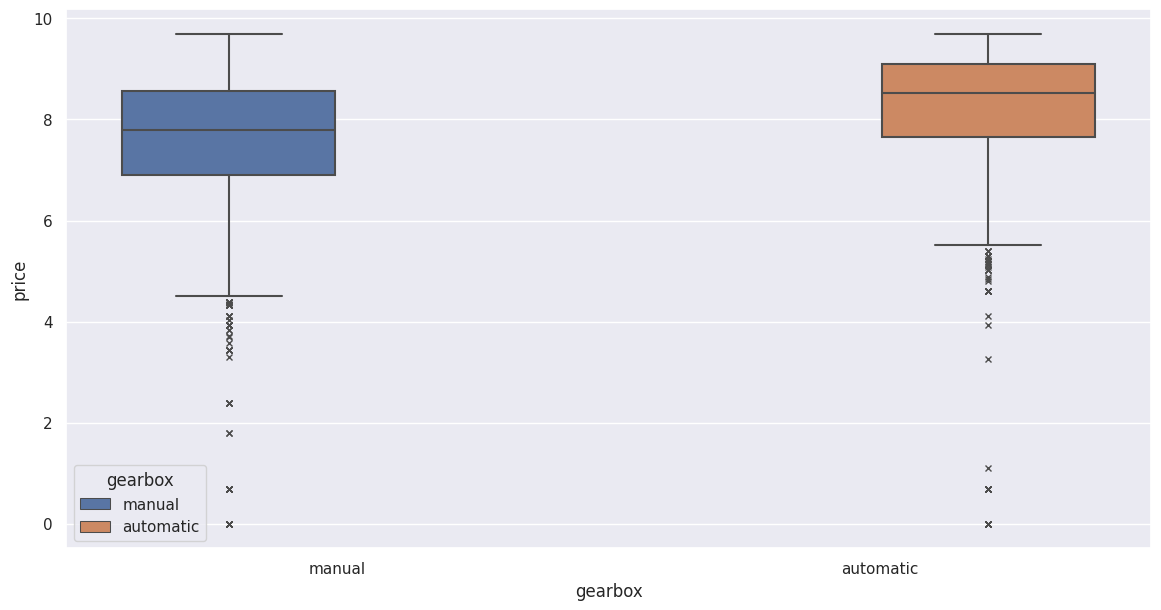

In [20]:
sns.set(rc={"figure.figsize":(14, 7)})
print("Ящик с усами между столбцами price и gearbox")
sns.boxplot(data=dataframe, y='price', x='gearbox', hue='gearbox', flierprops={"marker": "x"})

- По распределению цен в этом признаке видно, что вариант автоматической коробки передач выглядит дороже механики

Ящик с усами между столбцами price и fuelType


<AxesSubplot: xlabel='fuelType', ylabel='price'>

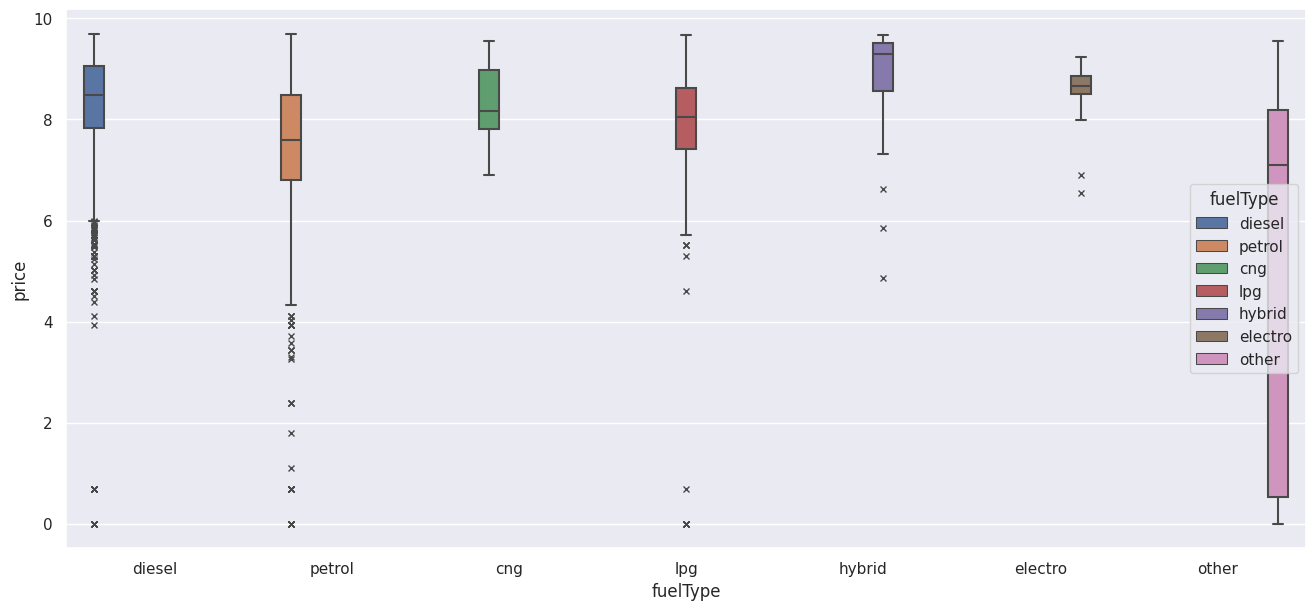

In [21]:
sns.set(rc={"figure.figsize":(16, 7)})
print("Ящик с усами между столбцами price и fuelType")
sns.boxplot(data=dataframe, y='price', x='fuelType', hue='fuelType', flierprops={"marker": "x"})

- Гибридные модели здесь наиболее дорогие, а электрические — самые короткие по ценовому диапазону

Ящик с усами между столбцами price и vehicleType


<AxesSubplot: xlabel='vehicleType', ylabel='price'>

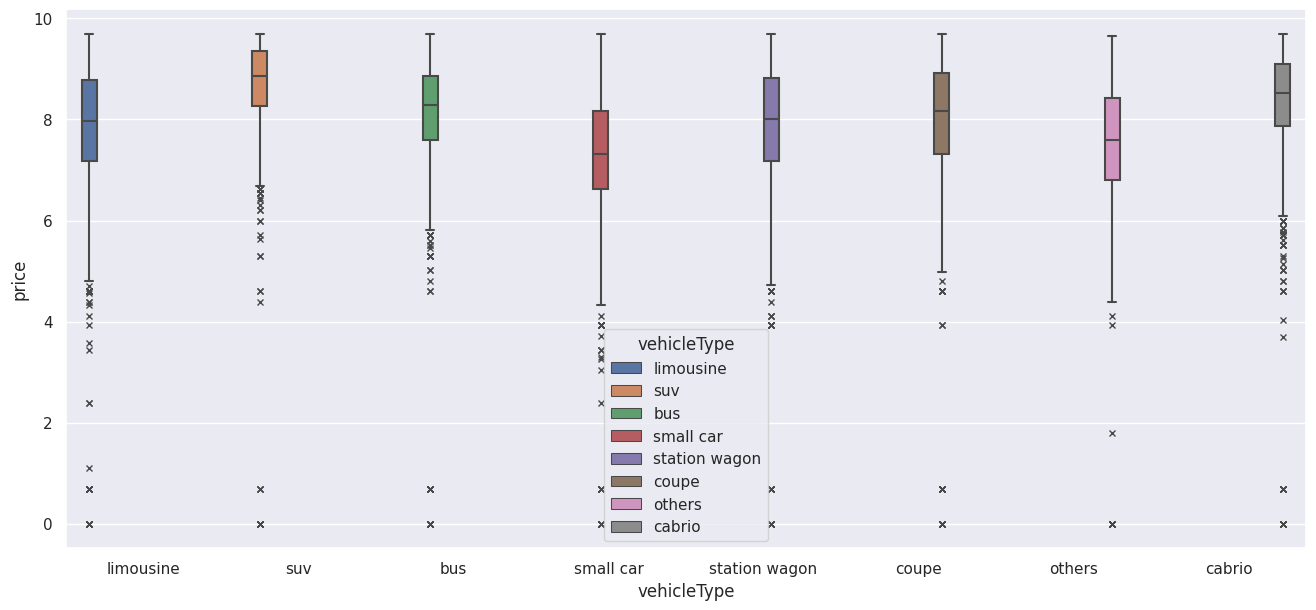

In [23]:
sns.set(rc={"figure.figsize":(16, 7)})
print("Ящик с усами между столбцами price и vehicleType")
sns.boxplot(data=dataframe, y='price', x='vehicleType', hue='vehicleType', flierprops={"marker": "x"})

- SUV (внедорожники) выглядят дороже всех

Ящик с усами между столбцами price и notRepairedDamage


<AxesSubplot: xlabel='notRepairedDamage', ylabel='price'>

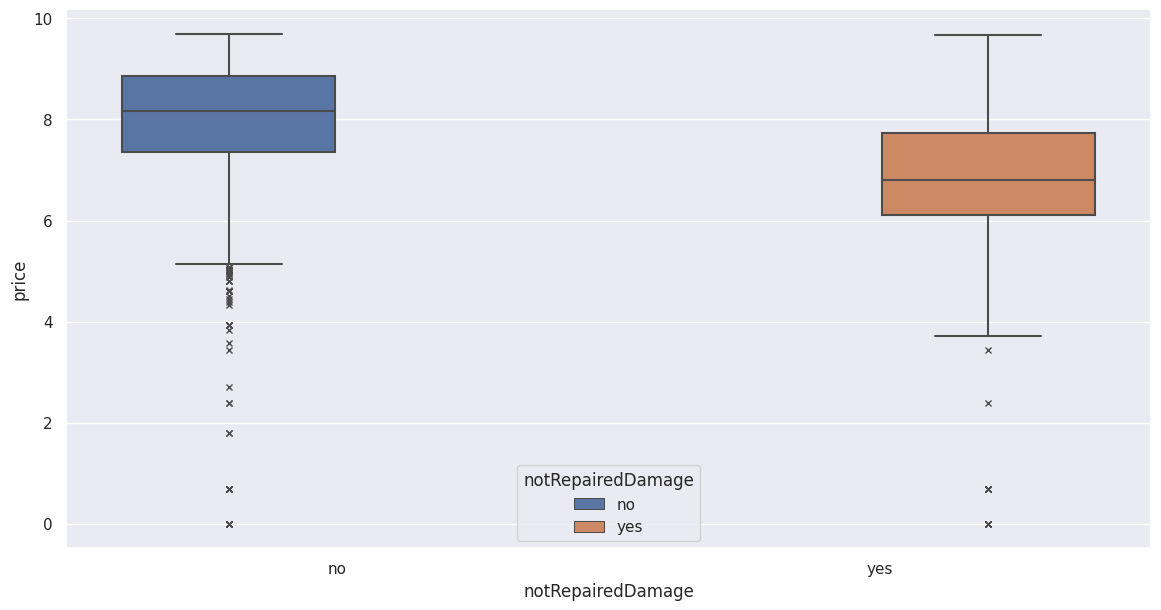

In [24]:
sns.set(rc={"figure.figsize":(14, 7)})
print("Ящик с усами между столбцами price и notRepairedDamage")
sns.boxplot(data=dataframe, y='price', x='notRepairedDamage', hue='notRepairedDamage', flierprops={"marker": "x"})

- Из этого графика следует довольно логичный график, что те автомобили, которые невозможно починить, стоят дешевле других


- Возможное удаление значений с малой частотой - не обязательно, поскольку это не сильно повлияет на дальнейшее исследование ~примерно одинаково.

7. Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [25]:
dataframe.isna().sum()[dataframe.isna().sum() > 0]

price                3757
vehicleType          5188
gearbox              2824
model                2758
fuelType             4503
notRepairedDamage    9716
dtype: int64

- Так как в столбце данных notRepairedDamage обильное количество пустых значений, сначала удалим его

In [26]:
dataframe = dataframe.dropna(subset=["notRepairedDamage"])
try:
    assert dataframe["notRepairedDamage"].isna().sum() == 0
    print("Проверка прошла успешно, пустые значения столбца notRepairedDamage удалены!")
except:
    print("В процессе проверки случилась следующая ошибка:")
    print(traceback.format_exc())

Проверка прошла успешно, пустые значения столбца notRepairedDamage удалены!


- Исследуем оставшиеся пустые значения полей данных нашего датасета. Поскольку они — категориальные, то мы сможем закрыть нынешнюю проблему с пустыми значениями через их прямое удаление или замену на медианный элемент

In [27]:
dataframe.isna().sum()[dataframe.isna().sum() > 0].to_dict().keys()

dict_keys(['price', 'vehicleType', 'gearbox', 'model', 'fuelType'])

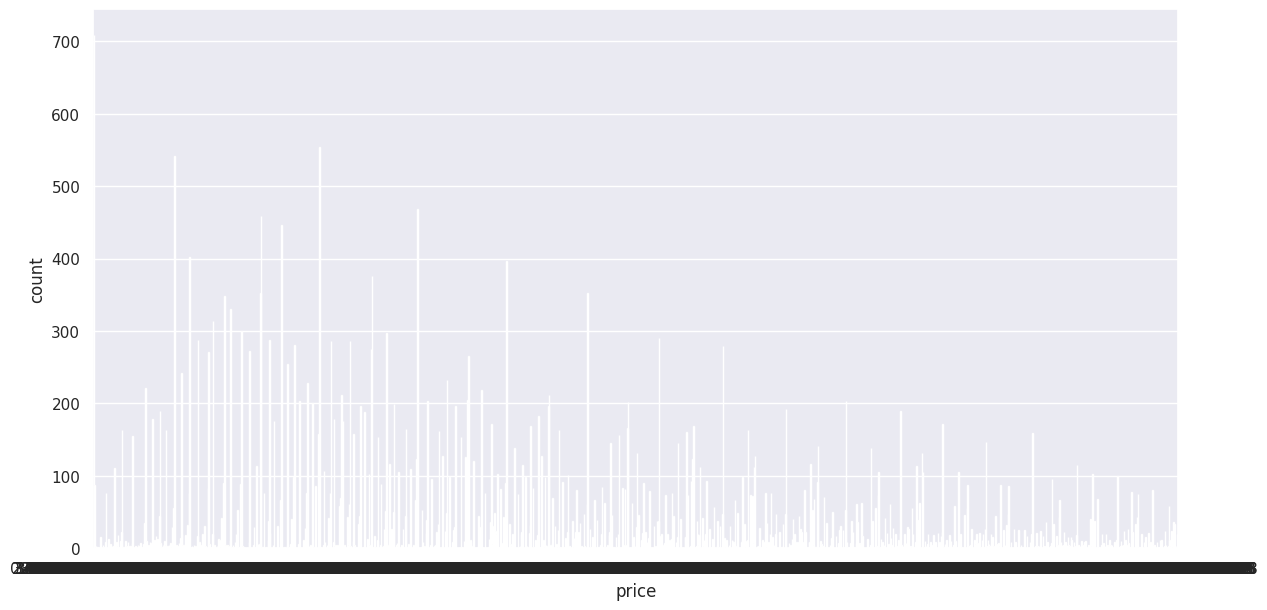

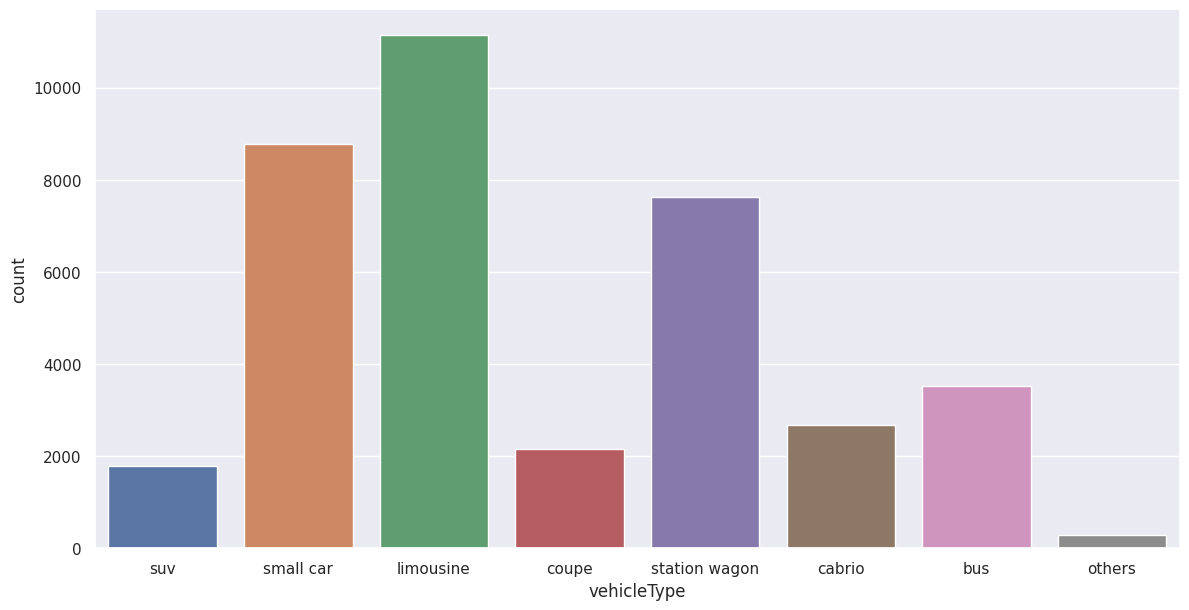

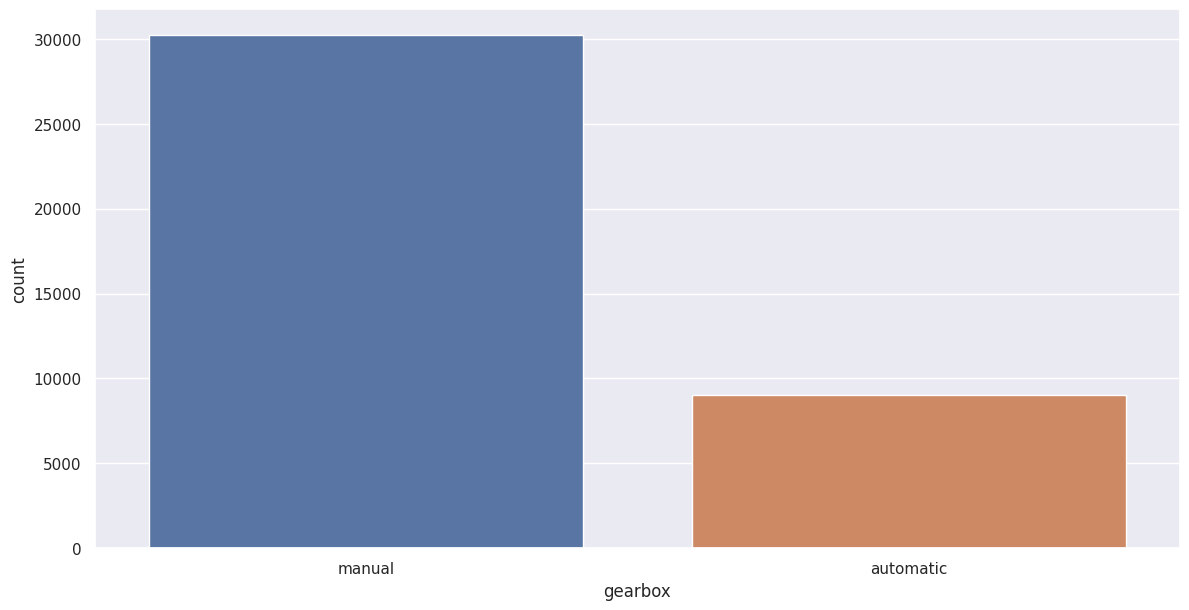

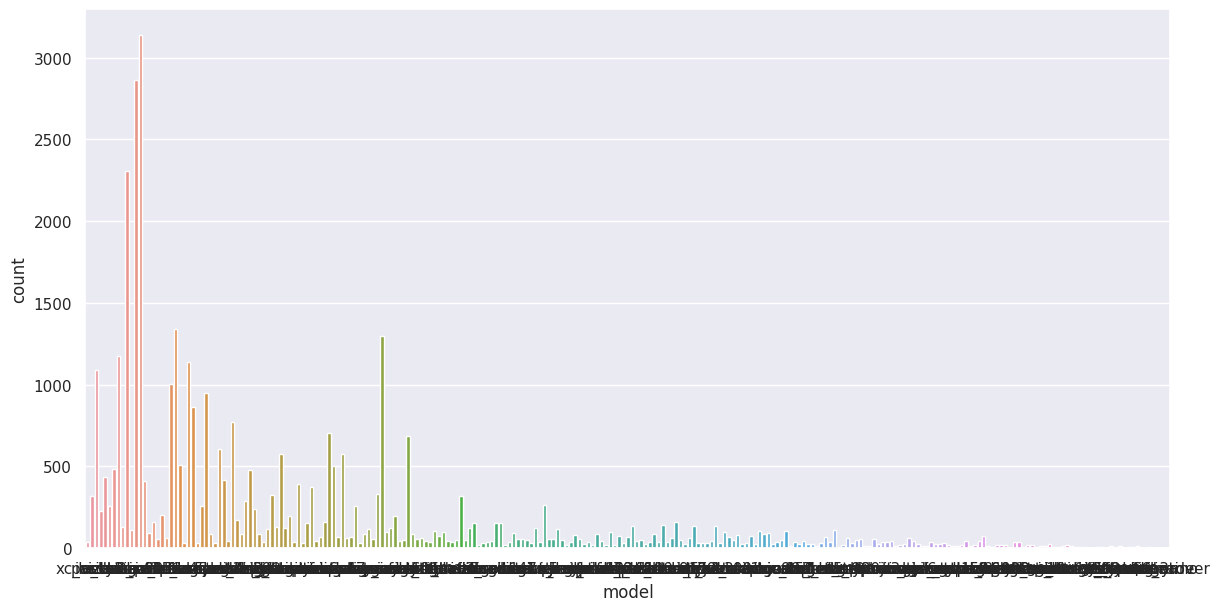

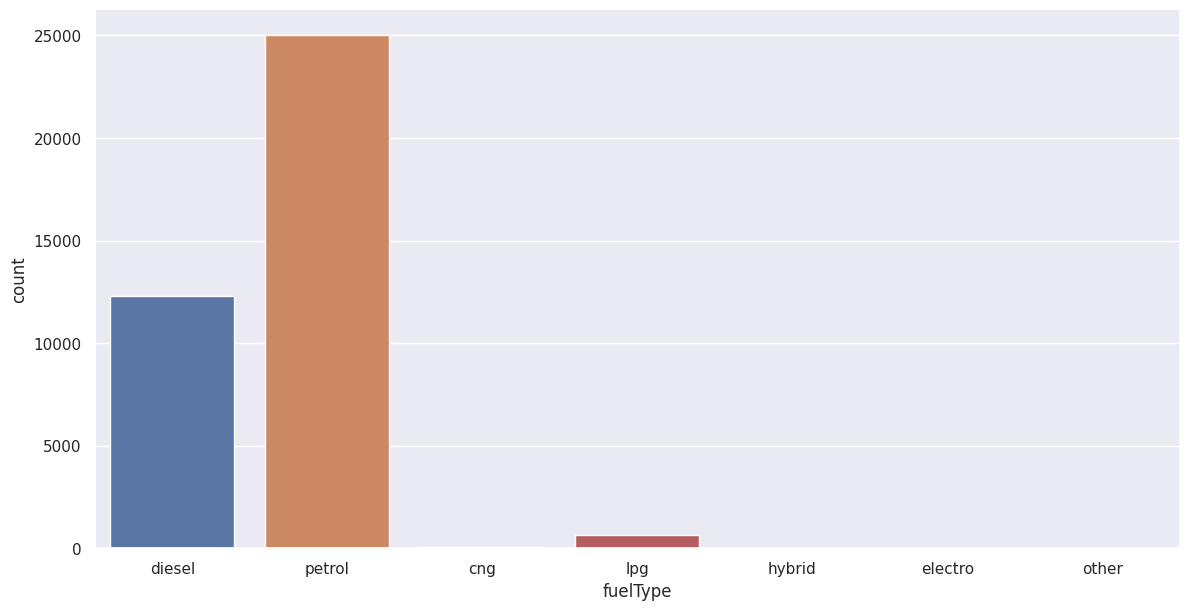

In [29]:
for column in dataframe.isna().sum()[dataframe.isna().sum() > 0].to_dict().keys():
    sns.countplot(x=dataframe[column])
    plt.show()

In [30]:
# Для признаков, кроме model и price, выставляем моду
for column in ["fuelType", "gearbox", "vehicleType"]:
    dataframe[column] = dataframe[column].fillna(dataframe[column].value_counts().index[0])

dataframe.isna().sum()[dataframe.isna().sum() > 0]

/tmp/ipykernel_27206/2001228108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = dataframe[column].fillna(dataframe[column].value_counts().index[0])
/tmp/ipykernel_27206/2001228108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = dataframe[column].fillna(dataframe[column].value_counts().index[0])
/tmp/ipykernel_27206/2001228108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

price    3548
model    1519
dtype: int64

In [31]:
# признаки price и model удаляем из выборки
dataframe = dataframe.dropna()
dataframe.shape

(35348, 19)

##### 8. Сохраните полученный датасет и выведите его.

In [32]:
dataframe

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,8.412055,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
5,2016-02-04 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,6.896694,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2016-02-04,26826,2016-02-04 12:51:00
7,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,7.244228,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,2016-03-24,13353,2016-03-27 12:45:00
8,2016-03-28 14:40:00,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,8.451267,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,2016-03-28,28307,2016-06-04 18:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,6.673298,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,2016-03-14,99310,2016-03-31 00:45:00
49993,2016-03-14 11:37:00,Renault_Clio_mit_Servolenkung_und_neuem_TÜV!,private,offer,6.722630,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no,2016-03-14,33659,2016-03-22 04:47:00
49995,2016-03-23 21:45:00,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,7.736744,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no,2016-03-23,27305,2016-04-04 01:47:00
49998,2016-03-14 18:51:00,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0.000000,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,2016-03-14,86956,2016-03-25 06:17:00


In [33]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35348 entries, 1 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          35348 non-null  datetime64[ns]
 1   name                 35348 non-null  object        
 2   seller               35348 non-null  object        
 3   offerType            35348 non-null  object        
 4   price                35348 non-null  float64       
 5   abtest               35348 non-null  object        
 6   vehicleType          35348 non-null  object        
 7   yearOfRegistration   35348 non-null  int64         
 8   gearbox              35348 non-null  object        
 9   powerPS              35348 non-null  int64         
 10  model                35348 non-null  object        
 11  kilometer            35348 non-null  int64         
 12  monthOfRegistration  35348 non-null  int64         
 13  fuelType             35348 non-

In [34]:
dataframe.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

In [35]:
dataframe.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,35348.000000,35348.000000,35348.000000,35348.000000,35348.000000,35348.000000
mean,7.801996,2003.403502,114.790653,129262.193052,6.072989,50975.709432
std,1.513854,33.939824,202.245335,35893.868823,3.544398,25729.256193
min,0.000000,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,7.170888,1999.000000,75.000000,125000.000000,3.000000,30855.000000
50%,8.006701,2003.000000,107.000000,150000.000000,6.000000,49759.500000
75%,8.779711,2007.000000,143.000000,150000.000000,9.000000,71697.250000
max,9.695910,7500.000000,19312.000000,150000.000000,12.000000,99998.000000


In [37]:
dataframe.to_csv('data/results.csv')

In [38]:
pd.read_csv("data/results.csv")

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
1,3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,8.412055,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
2,5,2016-02-04 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,6.896694,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2016-02-04,26826,2016-02-04 12:51:00
3,7,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,7.244228,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,2016-03-24,13353,2016-03-27 12:45:00
4,8,2016-03-28 14:40:00,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,8.451267,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,2016-03-28,28307,2016-06-04 18:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35343,49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,6.673298,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,2016-03-14,99310,2016-03-31 00:45:00
35344,49993,2016-03-14 11:37:00,Renault_Clio_mit_Servolenkung_und_neuem_TÜV!,private,offer,6.722630,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no,2016-03-14,33659,2016-03-22 04:47:00
35345,49995,2016-03-23 21:45:00,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,7.736744,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no,2016-03-23,27305,2016-04-04 01:47:00
35346,49998,2016-03-14 18:51:00,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0.000000,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,2016-03-14,86956,2016-03-25 06:17:00
